Markdown explanation needs to be added.

In [37]:
# Import the neccessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Load MNIST dataset
mnist = load_digits()

# Separate the features (X) and labels (y) from the dataset
X = mnist.data
y = mnist.target

# Preprocess data, remove Nan, prepare the dataset to be trained by the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Check for NaN values in the training and test data
if np.isnan(X_train).any() or np.isnan(X_test).any():
    raise ValueError("Input data contains NaN values. Please handle missing values before proceeding.")

# Normalize features using modified min-max scaling
def min_max_scaling(data):
    # Find the minimum and maximum values for each feature
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)

    # Exclude constant features from normalization
    constant_features = min_vals == max_vals
    min_vals[constant_features] = 0
    max_vals[constant_features] = 1

    # Perform min-max scaling on the data
    return (data - min_vals) / (max_vals - min_vals)

# Apply min-max scaling to normalize the training and test data
X_train_normalized = min_max_scaling(X_train)
X_test_normalized = min_max_scaling(X_test)

# Check for NaN values after normalization
if np.isnan(X_train_normalized).any() or np.isnan(X_test_normalized).any():
    raise ValueError("Normalized data contains NaN values. Please check the normalization process.")

# Implement Linear Regression from scratch
class LinearRegressionFromScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        # Initialize the learning rate and number of epochs for the model
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        # Initialize the model parameters
        self.theta = np.zeros(X.shape[1])

        # Iterate through epochs to update model parameters
        for epoch in range(self.epochs):
            # Compute the predicted values
            h = np.dot(X, self.theta)

            # Compute the gradient of the cost function
            gradient = np.dot(X.T, (h - y)) / y.size

            # Update the model parameters using gradient descent
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        # Make predictions using the trained model
        return np.dot(X, self.theta)

# Train Linear Regression model from scratch
model_scratch = LinearRegressionFromScratch()
model_scratch.fit(X_train_normalized, y_train)

MSE (Linear Regression from scratch): 4.333910653663672
MSE (Prebuilt Linear Regression): 3.808375332457631


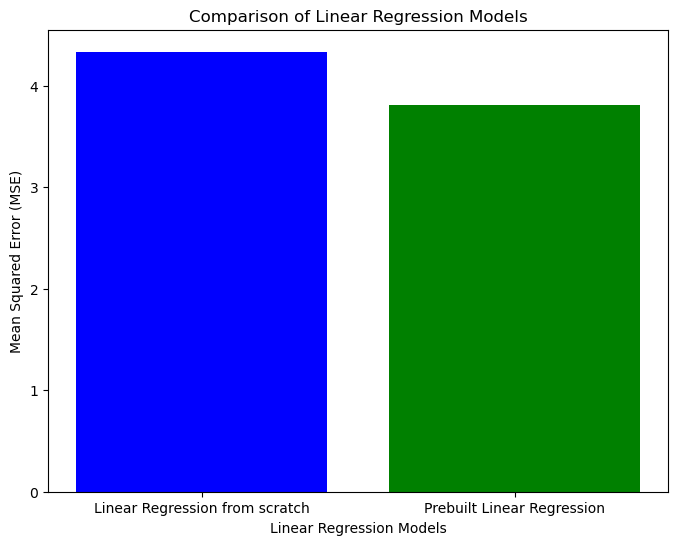

In [35]:
# Use prebuilt Linear Regression model
model_prebuilt = LinearRegression()
model_prebuilt.fit(X_train_normalized, y_train)

# Evaluate and compare models on test data
predictions_scratch = model_scratch.predict(X_test_normalized)
predictions_prebuilt = model_prebuilt.predict(X_test_normalized)

# Calculate Mean Squared Error (MSE) for both models --> MSE is what is used for regression models
mse_scratch = np.mean((predictions_scratch - y_test) ** 2)
mse_prebuilt = np.mean((predictions_prebuilt - y_test) ** 2)

# Print MSE values  
print(f"MSE (Linear Regression from scratch): {mse_scratch}")
print(f"MSE (Prebuilt Linear Regression): {mse_prebuilt}")

# Plot a bar graph to compare the performance of the two models
plt.figure(figsize=(8, 6))
models = ['Linear Regression from scratch', 'Prebuilt Linear Regression']
mse_values = [mse_scratch, mse_prebuilt]

plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('Comparison of Linear Regression Models')
plt.xlabel('Linear Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()



c:\Users\dasa7\anaconda3\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
c:\Users\dasa7\anaconda3\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\dasa7\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

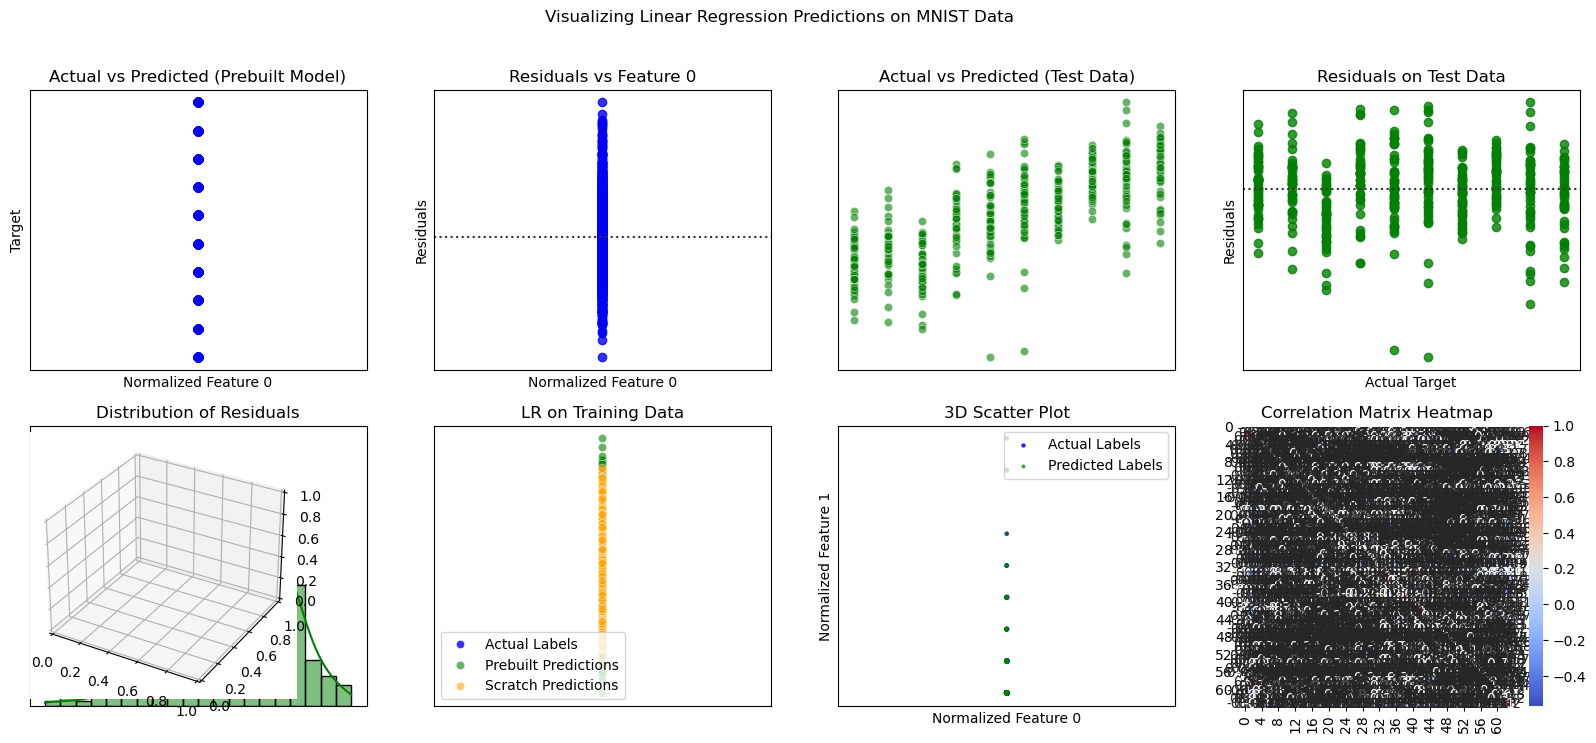

In [36]:
# Visualize data with various plots
fig, axes = plt.subplots(2, 4, figsize=(20, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.suptitle('Visualizing Linear Regression Predictions on MNIST Data')

# Plotting linear regression predictions against the first feature
sns.regplot(x=X_train_normalized[:, 0], y=y_train, ax=axes[0, 0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0, 0].set_title('Actual vs Predicted (Prebuilt Model)')
axes[0, 0].set_xlabel('Normalized Feature 0')
axes[0, 0].set_ylabel('Target')

# Plotting residuals
sns.residplot(x=X_train_normalized[:, 0], y=y_train - model_prebuilt.predict(X_train_normalized), ax=axes[0, 1], scatter_kws={'color': 'blue'})
axes[0, 1].set_title('Residuals vs Feature 0')
axes[0, 1].set_xlabel('Normalized Feature 0')
axes[0, 1].set_ylabel('Residuals')

# Plotting predicted vs actual values
sns.scatterplot(x=y_test, y=predictions_prebuilt, ax=axes[0, 2], color='green', alpha=0.6)
axes[0, 2].set_title('Actual vs Predicted (Test Data)')
axes[0, 2].set_xlabel('Actual Target')
axes[0, 2].set_ylabel('Predicted Target')

# Plotting residuals on test data
sns.residplot(x=y_test, y=predictions_prebuilt - y_test, ax=axes[0, 3], color='green')
axes[0, 3].set_title('Residuals on Test Data')
axes[0, 3].set_xlabel('Actual Target')
axes[0, 3].set_ylabel('Residuals')

# Plotting distribution of residuals
sns.histplot(predictions_prebuilt - y_test, bins=20, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')

# Visualize Linear Regression predictions on training data
sns.scatterplot(x=X_train_normalized[:, 0], y=y_train, color='blue', alpha=0.8, label='Actual Labels', ax=axes[1, 1])
sns.scatterplot(x=X_train_normalized[:, 0], y=model_prebuilt.predict(X_train_normalized), color='green', alpha=0.6, label='Prebuilt Predictions', ax=axes[1, 1])
sns.scatterplot(x=X_train_normalized[:, 0], y=model_scratch.predict(X_train_normalized), color='orange', alpha=0.6, label='Scratch Predictions', ax=axes[1, 1])
axes[1, 1].set_title('LR on Training Data')
axes[1, 1].set_xlabel('Normalized Feature 0')
axes[1, 1].set_ylabel('Target')
axes[1, 1].legend()

axes_3d = fig.add_subplot(2, 5, 6, projection='3d')

# Plotting a 3D scatter plot of predicted values against the first two features
axes[1, 2].scatter(X_test_normalized[:, 0], X_test_normalized[:, 1], y_test, c='blue', label='Actual Labels', alpha=0.8)
axes[1, 2].scatter(X_test_normalized[:, 0], X_test_normalized[:, 1], predictions_prebuilt, c='green', label='Predicted Labels', alpha=0.6)
axes[1, 2].set_title('3D Scatter Plot')
axes[1, 2].set_xlabel('Normalized Feature 0')
axes[1, 2].set_ylabel('Normalized Feature 1')  # Use set_ylabel for the y-axis label
axes[1, 2].legend()

# Plotting a heatmap of the correlation matrix
corr_matrix = np.corrcoef(X_train_normalized, rowvar=False)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1, 3])
axes[1, 3].set_title('Correlation Matrix Heatmap')


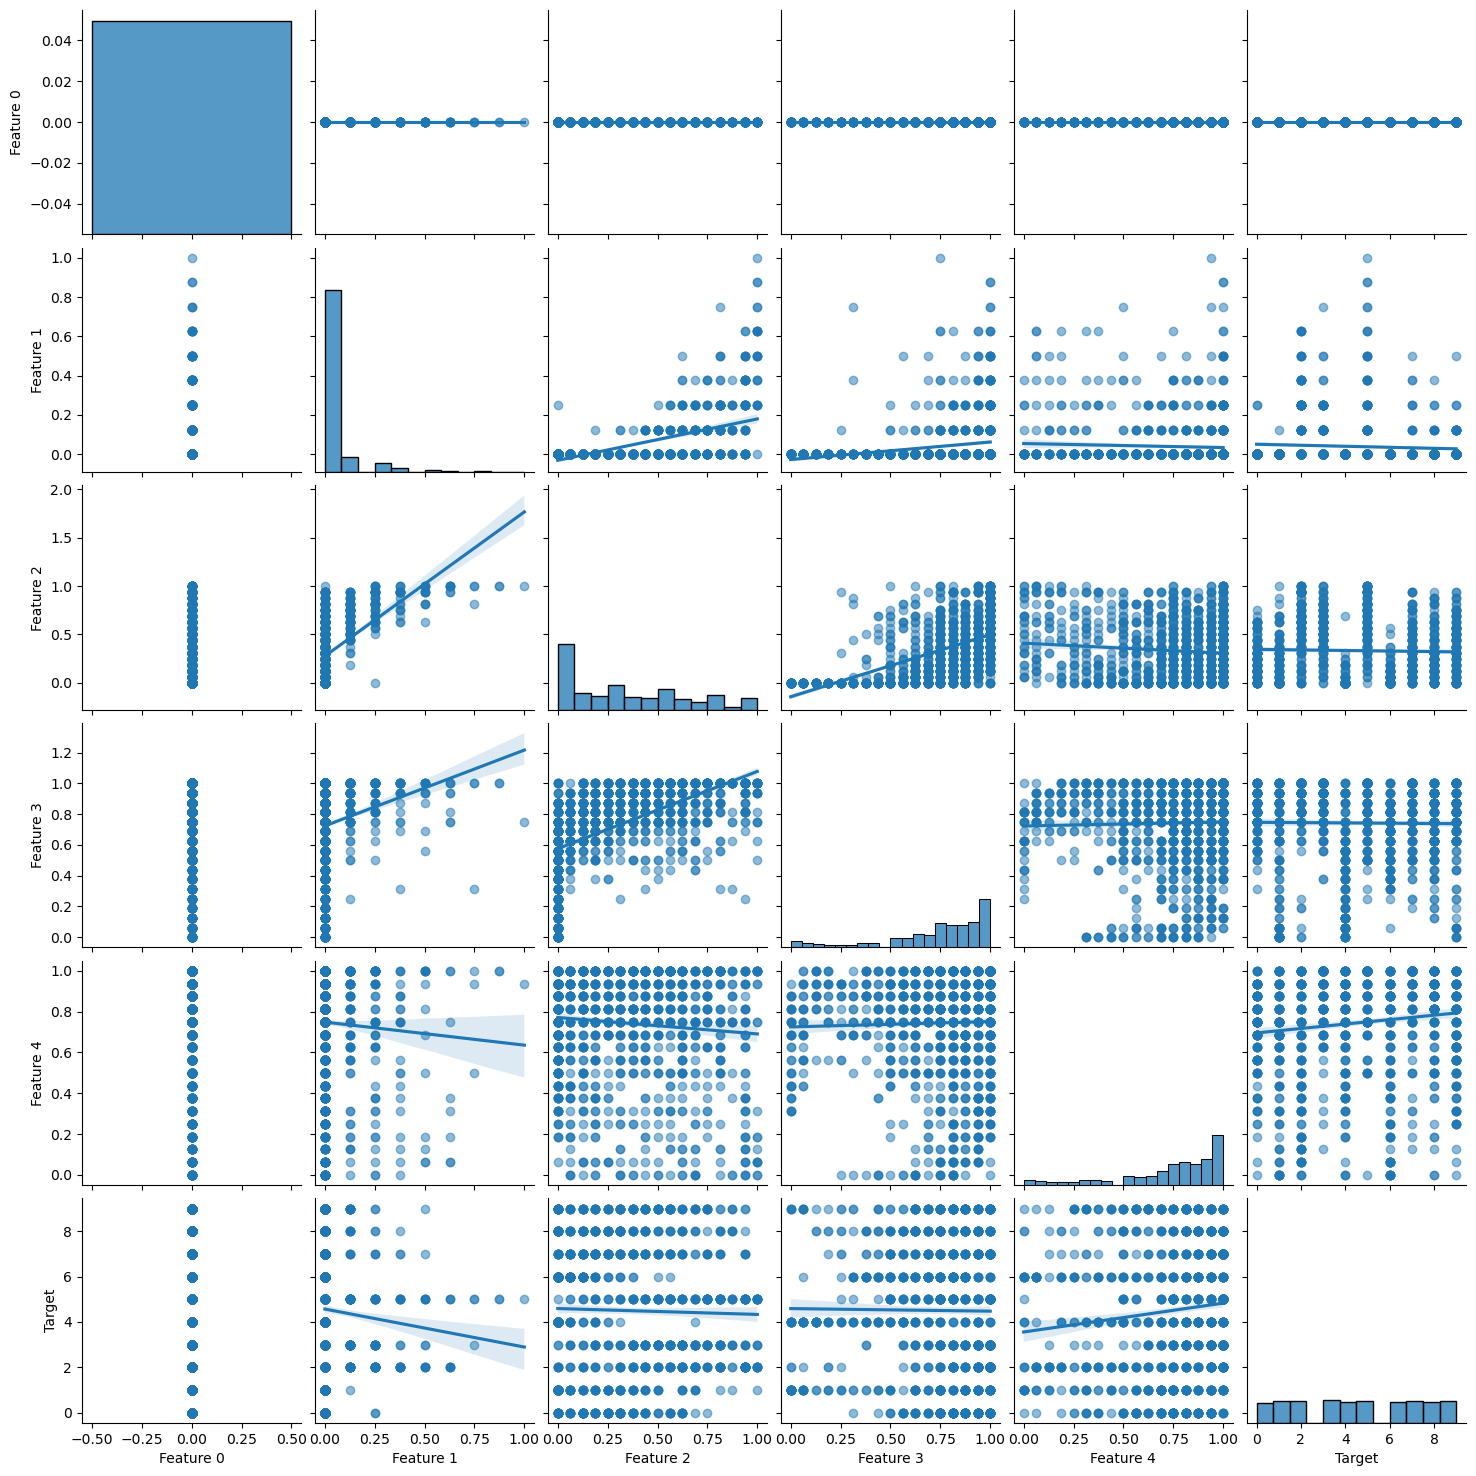

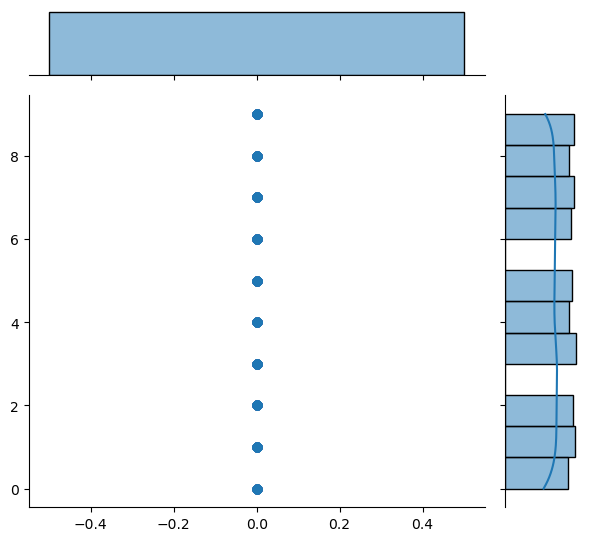

In [34]:
# Combine normalized features and target variable into a DataFrame
df_pairplot = pd.DataFrame(X_train_normalized[:, :5], columns=[f'Feature {i}' for i in range(5)])
df_pairplot['Target'] = y_train

# Plotting a pairplot of the first five features with regression line
sns.pairplot(data=df_pairplot, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.5}})

# Plotting a joint plot of the first two features with regression line
sns.jointplot(x=X_train_normalized[:, 0], y=y_train, kind='reg', scatter_kws={'alpha': 0.5})

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

